In [49]:
import numpy as np
import glob
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr
import pyproj as proj
from scipy.stats import norm

def folder2cube(files, size_raster):
    base_set = glob.glob(files)
    cube = np.zeros(size_raster + (len(base_set),))
    for i, model in enumerate(base_set): 
        cube[:,:,i] = np.loadtxt(model, skiprows = 1).reshape(size_raster)
    return cube, len(base_set)


size_raster = (250,162)


In [2]:
base_cube, base_n = folder2cube('data/Hackaton/BaseSet/MapSimu__*.data',size_raster)
top_cube, top_n = folder2cube('data/Hackaton/TopSet/MapSimu__*.data',size_raster)


In [3]:
volume_file = 'data/Hackaton/VolumeDistribution/Volumes'

vol = pd.read_csv(volume_file, delim_whitespace=True)

In [62]:
ds = xr.Dataset()  

X_corner = 390885
Y_corner = 7156947
dx, dy = 25, 25

#top_model = np.min([np.min(base_cube),np.min(top_cube)])
#bottom_model = np.max([np.max(base_cube),np.max(top_cube)])

top_model = 900
bottom_model = 1100
dz = 100


xx = np.linspace(X_corner, X_corner+size_raster[0]*dx, size_raster[0])
yy = np.linspace(Y_corner, Y_corner+size_raster[1]*dy, size_raster[1])
zz = np.linspace(bottom_model, top_model, dz)

model = np.linspace(0, top_model, base_n)

ds.coords['X'] = xx
ds.coords['Y'] = yy
ds.coords['Z'] = zz
ds.coords['MODEL'] = model

ds['BASE'] = (('X', 'Y', 'MODEL'), base_cube)
ds['TOP'] = (('X', 'Y', 'MODEL'), top_cube)


In [63]:
base_mean = ds['BASE'].mean(dim='MODEL')
base_std = ds['BASE'].std(dim='MODEL')

top_mean = ds['TOP'].mean(dim='MODEL')
top_std = ds['TOP'].std(dim='MODEL')


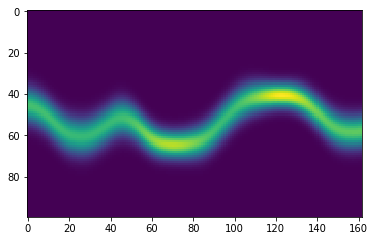

In [116]:
plt.imshow(top_cloud[50,:,:].T)
plt.show()


In [110]:
top_cloud = np.zeros(size_raster + (dz,))
base_cloud = np.zeros(size_raster + (dz,))

for x in range(0,len(xx)):
    for y in range(0,len(yy)):
        top_cloud[x,y,:] = norm.pdf(zz,top_mean.values[x,y],top_std.values[x,y])

for x in range(0,len(xx)):
    for y in range(0,len(yy)):
        base_cloud[x,y,:] = norm.pdf(zz,base_mean.values[x,y],base_std.values[x,y])


/Users/tobiasstal/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1652: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [91]:
a = base_mean[100,140]

In [102]:
top_cloud[100,100,:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
size_raster

In [98]:
vol

,Num,X,Y,Z,Real_Index,Real_Index_Top,Real_Index_Bot_Thick,Oil_GRV_10_6,spill_Z,top_Z,OWC_depth,OWC_area_10_6,nb_Connected,GRV_density__m_,Hc_column__m_,Oil_GRV_quantile,OWC_Base_Area_10_6
0,1.0,395720.31806,7.159352e+06,990.57928,0.0,0.0,0.0,104.44463,990.57928,949.99261,990.57928,6.70188,1.0,15.58439,40.58667,73.0,3.51000
1,2.0,395846.38740,7.159426e+06,984.03906,1.0,1.0,1.0,68.33327,984.03906,950.99329,984.03906,5.15938,1.0,13.24448,33.04578,20.0,3.24813
2,3.0,395794.94946,7.159326e+06,985.98395,2.0,2.0,2.0,62.89583,985.98395,947.91071,985.98395,4.94812,1.0,12.71104,38.07324,15.5,2.29312
3,4.0,395721.03963,7.159402e+06,991.87573,3.0,3.0,3.0,79.26017,991.87573,942.91193,991.87573,5.41500,1.0,14.63715,48.96381,32.5,3.78312
4,5.0,394344.48197,7.157572e+06,996.64435,4.0,4.0,4.0,128.36824,996.64435,944.85858,996.64435,7.77688,1.0,16.50640,51.78577,96.5,4.02250
5,6.0,395719.95727,7.159327e+06,987.54742,5.0,5.0,5.0,86.93113,987.54742,950.94189,987.54742,5.70813,1.0,15.22937,36.60553,45.0,3.46250
6,7.0,395694.95988,7.159328e+06,993.57971,6.0,6.0,6.0,78.35999,993.57971,951.34204,993.57971,5.47125,1.0,14.32214,42.23767,31.5,2.66875
7,8.0,395871.38480,7.159425e+06,987.84381,7.0,7.0,7.0,101.64483,987.84381,939.97577,987.84381,7.08750,1.0,14.34142,47.86804,71.5,4.25938
8,9.0,395769.95207,7.159327e+06,984.17371,8.0,8.0,8.0,82.04396,984.17371,948.12750,984.17371,5.96938,1.0,13.74415,36.04620,37.0,3.87500
9,10.0,395694.59909,7.159303e+06,990.49902,9.0,9.0,9.0,85.89178,990.49902,952.26709,990.49902,5.64625,1.0,15.21218,38.23193,43.0,3.46937
